# HSMA Exercise

The data loaded in this exercise is for seven acute stroke units, and whether a patient receives clost-busting treatment for stroke.  There are lots of features, and a description of the features can be found in the file stroke_data_feature_descriptions.csv.

Train a decision tree model to try to predict whether or not a stroke patient receives clot-busting treatment.  Use the prompts below to write each section of code.

## Core - Fitting and Evaluating a Decision Tree

Run the code below to import the dataset and the libraries we need. 

In [65]:
import pandas as pd
import numpy as np

# import preprocessing functions
from sklearn.model_selection import train_test_split

# Import machine learning model of interest
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Import package to investigate our loaded dataframe
from ydata_profiling import ProfileReport

# Import functions for evaluating model
from sklearn.metrics import recall_score, precision_score

# Imports relating to logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Imports relating to plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Download data
# (not required if running locally and have previously downloaded data)

download_required = True

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '2004_titanic/master/jupyter_notebooks/data/hsma_stroke.csv'
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data to data subfolder
    data.to_csv(data_directory + 'hsma_stroke.csv', index=False)

# Load data
data = pd.read_csv('data/hsma_stroke.csv')
# Make all data 'float' type
data = data.astype(float)
# Show data
data.head()

,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,...,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,...,2.0,0.0,4.0,1.0,4.0,0.0,1.0,2.0,2.0,1.0


Look at an overview of the data by running the code below.

We're going to use a library we haven't covered before to give a quick summary of the dataframe. 

You used this data last week, so it should feel familiar to you. 

Do you prefer this method or the code you used last week in the logistic regression exercise?

In [66]:
# profile = ProfileReport(data)

# profile.to_notebook_iframe()

Load in the 'stroke_data_feature_descriptions' dataframe and view that too - you can just view the whole dataframe with pandas rather than using the ProfileReport. 

Hint: it's in the same folder as the hsma_stroke.csv dataset we imported above.

In [67]:
stroke_data_feature_descriptions_df = pd.read_csv('../datasets/stroke_data_feature_descriptions.csv')

stroke_data_feature_descriptions_df

,Feature,Description
0,# Comorbidities,Number of comorbidities
1,2+ comorbidotes,If the patient had at least two comorbidities
2,80+,If the patient is aged 80 or over
3,Age,Age of patient
4,Anticoag before stroke_0,Did not take anticoagulants before stroke
5,Anticoag before stroke_1,Did take anticoagulants before stroke
6,Anticoag before stroke_NK,Not known if was taking anticoagulants before ...
7,Antiplatelet_0,Did not receive antiplatelet treatment
8,Antiplatelet_1,Did receive antiplatelet treatment
9,Antiplatelet_NK,Not known if received antiplatelet treatment


Divide the main stroke dataset into features and labels.

Remember - we're trying to predict whether patients are given clotbusting treatment or not.

What column contains that information?

In [68]:
X = data.drop('Clotbuster given', axis=1)
y = data['Clotbuster given']

Split the data into training and testing sets. 

Start with a train/test split of 80/20. 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=127)

Fit a Decision Tree model.

In [70]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Use the trained model to predict labels in both training and test sets, and calculate and compare accuracy.

In [71]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")

Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 75.603%


Calculate the additional model metrics for the test data only.

- precision
- specificity
- recall (sensitivity)

Return the 'micro' average in each case.

In [72]:
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")

Precision score for testing data = 75.603%
Recall (sensitivity) score for testing data = 75.603%
Specificity score for testing data = 78.972%


In [97]:
# we learn this in a later session - but a nice way to compare and contrast
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       117
         1.0       0.67      0.80      0.73        70

    accuracy                           0.78       187
   macro avg       0.77      0.78      0.77       187
weighted avg       0.79      0.78      0.78       187



Plot the decision tree.

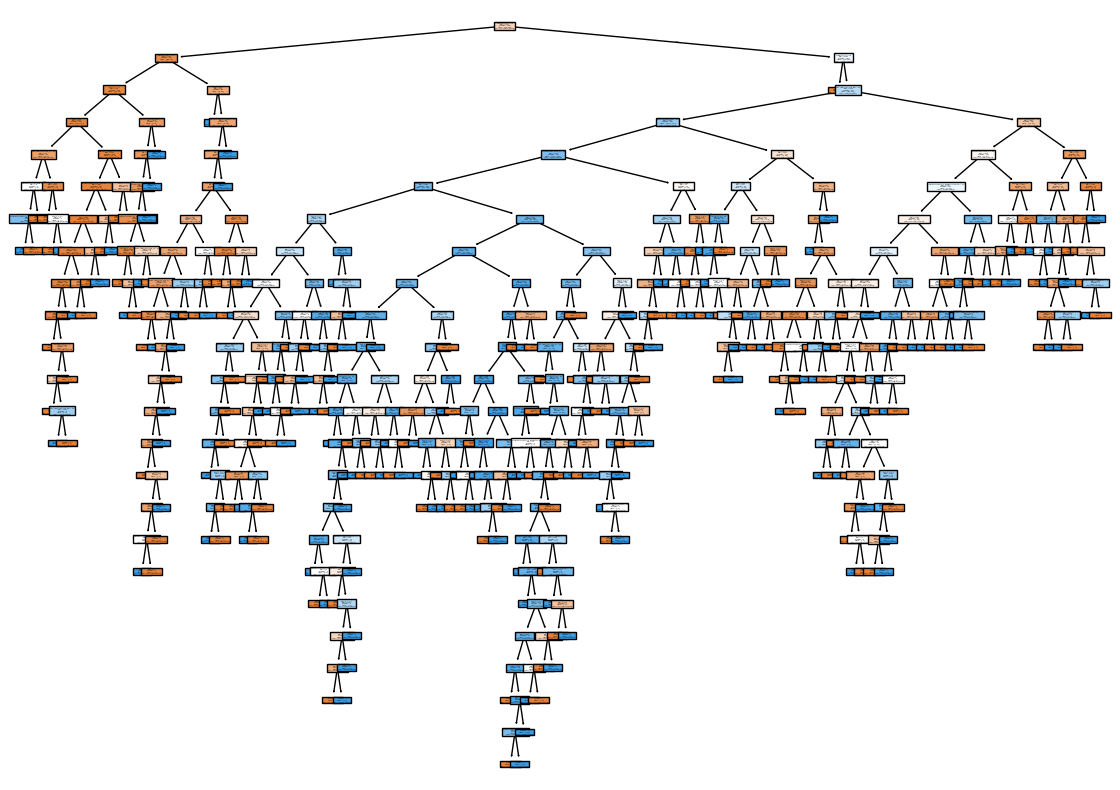

In [73]:
fig, ax = plt.subplots(figsize=(14,10))

fig = plot_tree(
    model,
    feature_names = X.columns.tolist(),
    class_names=["Not Given Clotbuster", "Given Clotbuster"],
    filled = True,
    ax=ax
)

plt.show()


## Extension - Refining Your Decision Tree

Let's experiment by changing a few parameters.

### Maximum Depth

Try changing the value of the 'max_depth' parameter when setting up your DecisionTreeClassifier.

Output the 
- accuracy (train and test)
- precision (test)
- specificity (test)
- and recall (sensitivity) (test) 

of this new classifier.

In [74]:
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")

Accuracy of predicting training data = 80.524%
Accuracy of predicting testing data = 81.233%
Precision score for testing data = 81.233%
Recall (sensitivity) score for testing data = 81.233%
Specificity score for testing data = 87.565%


In [75]:
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")

Accuracy of predicting training data = 78.308%
Accuracy of predicting testing data = 77.748%
Precision score for testing data = 77.748%
Recall (sensitivity) score for testing data = 77.748%
Specificity score for testing data = 83.000%


In [76]:
def fit_dt_model(model):
    model = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    precision_score_test = precision_score(y_test, y_pred_test, average='micro')
    recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
    specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

    # Note that the lecture slides show this displayed as a float using :3f
    # We can instead use :.3% to format the number as a percentage to 3 decimal places.
    print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
    print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
    print(f"Precision score for testing data = {precision_score_test:.3%}")
    print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
    print(f"Specificity score for testing data = {specificity_score_test:.3%}")

fit_dt_model(model = DecisionTreeClassifier(max_depth=8, random_state=42))

Accuracy of predicting training data = 86.367%
Accuracy of predicting testing data = 78.820%
Precision score for testing data = 78.820%
Recall (sensitivity) score for testing data = 78.820%
Specificity score for testing data = 83.010%


In [77]:
fit_dt_model(model = DecisionTreeClassifier(max_depth=4, random_state=42))

Accuracy of predicting training data = 79.449%
Accuracy of predicting testing data = 80.161%
Precision score for testing data = 80.161%
Recall (sensitivity) score for testing data = 80.161%
Specificity score for testing data = 80.786%


### Minimum Samples

Try changing the values of 'min_samples_split' (the default value is 2).

In [78]:
model = DecisionTreeClassifier(min_samples_split=6, random_state=42)
model = model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")

Accuracy of predicting training data = 95.097%
Accuracy of predicting testing data = 74.531%
Precision score for testing data = 74.531%
Recall (sensitivity) score for testing data = 74.531%
Specificity score for testing data = 76.549%


In [79]:
fit_dt_model(model = DecisionTreeClassifier(min_samples_split=4, random_state=42))

Accuracy of predicting training data = 97.381%
Accuracy of predicting testing data = 76.408%
Precision score for testing data = 76.408%
Recall (sensitivity) score for testing data = 76.408%
Specificity score for testing data = 79.535%


Now try adjusting 'min_samples_leaf' (the default is 1).

In [80]:
model = DecisionTreeClassifier(min_samples_leaf=6, random_state=42)
model = model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")

Accuracy of predicting training data = 87.710%
Accuracy of predicting testing data = 77.748%
Precision score for testing data = 77.748%
Recall (sensitivity) score for testing data = 77.748%
Specificity score for testing data = 77.049%


In [81]:
fit_dt_model(model = DecisionTreeClassifier(min_samples_split=3, random_state=42))

Accuracy of predicting training data = 99.127%
Accuracy of predicting testing data = 73.727%
Precision score for testing data = 73.727%
Recall (sensitivity) score for testing data = 73.727%
Specificity score for testing data = 76.233%


### Split Criterion

Compare the performance when using 

- Gini Impurity
- Entropy
- Log Loss

In [82]:
print("Gini")
fit_dt_model(model = DecisionTreeClassifier(criterion="gini", random_state=42))

Gini
Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 75.335%
Precision score for testing data = 75.335%
Recall (sensitivity) score for testing data = 75.335%
Specificity score for testing data = 78.605%


In [83]:
print("Entropy")
fit_dt_model(model = DecisionTreeClassifier(criterion="entropy", random_state=42))

Entropy
Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 77.212%
Precision score for testing data = 77.212%
Recall (sensitivity) score for testing data = 77.212%
Specificity score for testing data = 79.545%


In [84]:
print("Log Loss")
fit_dt_model(model = DecisionTreeClassifier(criterion="log_loss", random_state=42))

Log Loss
Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 77.212%
Precision score for testing data = 77.212%
Recall (sensitivity) score for testing data = 77.212%
Specificity score for testing data = 79.545%


## Comparing Performance with a Logistic Regression Model

Copy your code in from last week's logistic regression exercise (or write this in from scratch - there isn't much that is different to the decision tree model!). 

**Remember - you will need to standardise the data for the logistic regression model!**

Look at these additional metrics as well:

- precision
- specificity
- recall (sensitivity)

In [85]:
scaler = StandardScaler()

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.fit_transform(X_test)

model = LogisticRegression()
model = model.fit(X_train_stand, y_train)
y_pred_train = model.predict(X_train_stand)
y_pred_test = model.predict(X_test_stand)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")

Accuracy of predicting training data = 81.531%
Accuracy of predicting testing data = 82.574%
Precision score for testing data = 82.574%
Recall (sensitivity) score for testing data = 82.574%
Specificity score for testing data = 83.784%


Use the cell below to write out an interpretation of the performance of the logistic regression model and the decision tree. 

Think about the presence of **false positives** and **false negatives**. 

Which might you be more interested in minimizing in this model? 

Hint - giving thrombolysis to good candidates for it can lead to less disability after stroke and improved outcomes. However, there is a risk that giving thrombolysis to the wrong person could lead to additional bleeding on the brain and worse outcomes. What might you want to balance?

*No answer given*

## Challenge Exercises

### Bonus Exercise 1

Have a read of this article on feature importance in decision trees: [Article Link](https://www.codecademy.com/article/fe-feature-importance-final)

In particular, make sure you read the section "Pros and cons of using Gini importance" so you can understand some of the things you need to keep in mind when looking at feature importance in trees.

We can access the feature importance by running the following code:

In [86]:
# modify this code to point towards your decision tree model object (make sure that object
# was using the gini index as the criteria)
model_dt = DecisionTreeClassifier(criterion="gini", random_state=42)
model_dt = model_dt.fit(X_train, y_train)

feature_importances_dt = model_dt.feature_importances_

feature_importances_dt

array([0.01364131, 0.00456272, 0.00586152, 0.01439673, 0.00110657,
       0.01397118, 0.01249914, 0.00889   , 0.08702842, 0.00186827,
       0.05481699, 0.        , 0.01165528, 0.01608714, 0.00869807,
       0.00445253, 0.01247073, 0.        , 0.00643961, 0.01070718,
       0.01356352, 0.0064616 , 0.00336373, 0.00394369, 0.00672135,
       0.01659303, 0.        , 0.        , 0.00157772, 0.        ,
       0.00463295, 0.        , 0.        , 0.1380051 , 0.0602852 ,
       0.2124907 , 0.01367527, 0.01015513, 0.00578212, 0.01669722,
       0.02725587, 0.02481184, 0.02105913, 0.02376351, 0.02466254,
       0.01465469, 0.00871107, 0.02615918, 0.003855  , 0.02196545])

How does this compare to the feature importance for your logistic regression?

HINT: This is quite different from the approach used in the model.

You'll need to look back at the exercises form last week.

In [87]:
# modify this code to point towards your logistic regression model object
scaler = StandardScaler()

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.fit_transform(X_test)

model_lr = LogisticRegression()
model_lr = model_lr.fit(X_train_stand, y_train)

# Examine feature weights and sort by most influential
co_eff = model_lr.coef_[0]

co_eff_df = pd.DataFrame()
co_eff_df['feature'] = list(X)
co_eff_df['co_eff'] = co_eff
co_eff_df['abs_co_eff'] = np.abs(co_eff)
co_eff_df.sort_values(by='abs_co_eff', ascending=False, inplace=True)

co_eff_df

,feature,co_eff,abs_co_eff
33,Stroke Type_PIH,-1.138691,1.138691
32,Stroke Type_I,1.138691,1.138691
28,Stroke severity group_2. Minor,-0.655217,0.655217
29,Stroke severity group_3. Moderate,0.558470,0.558470
34,S2RankinBeforeStroke,-0.507321,0.507321
47,S2NihssArrivalBestLanguage,0.458131,0.458131
10,Onset Time Known Type_BE,-0.290595,0.290595
25,Anticoag before stroke_1,-0.274249,0.274249
12,Onset Time Known Type_P,0.266564,0.266564
27,Stroke severity group_1. No stroke symtpoms,-0.248087,0.248087


Can you create two graphs showing feature importance for the two models?

Instead of using the plot code used in the linked article, try looking up the 
`barh` function from matplotlib. 


Try ordering your plot so that the features with the most importance are at the top.

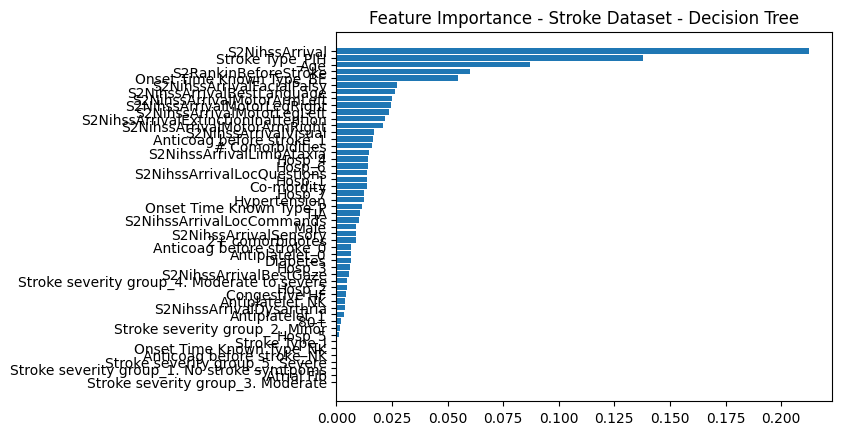

In [88]:
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances_dt.argsort()[::-1]

sorted_feature_names =[X.columns[i] for i in sorted_indices]

sorted_importances = feature_importances_dt[sorted_indices]

# Create a bar plot of the feature importances
fig, ax = plt.subplots()
ax.barh(width=sorted_importances, y=sorted_feature_names)
ax.invert_yaxis()
ax = plt.title("Feature Importance - Stroke Dataset - Decision Tree")

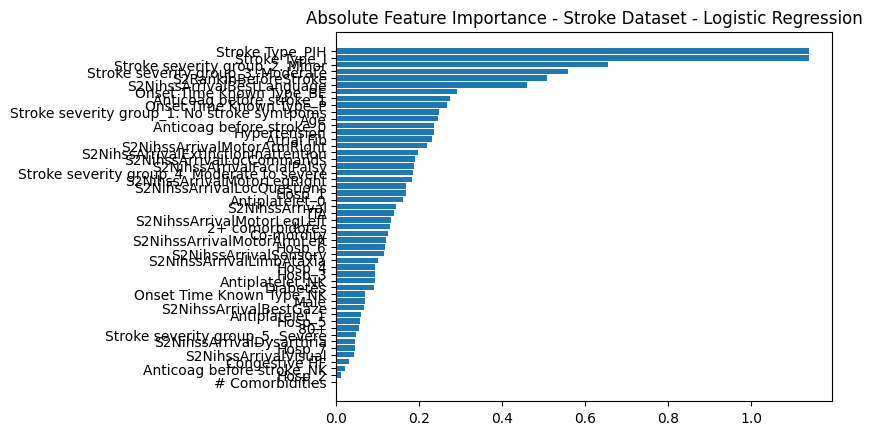

In [89]:
fig, ax = plt.subplots()
ax.barh(width=co_eff_df['abs_co_eff'], y=co_eff_df['feature'])
ax.invert_yaxis()
ax = plt.title("Absolute Feature Importance - Stroke Dataset - Logistic Regression")

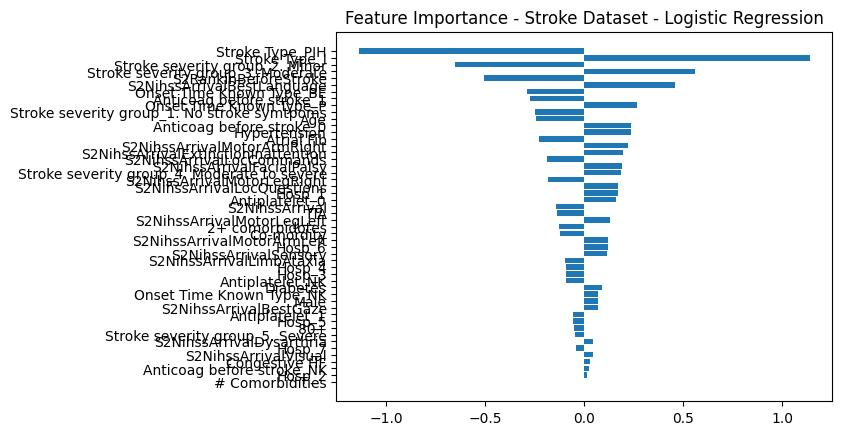

In [90]:
fig, ax = plt.subplots()
ax.barh(width=co_eff_df['co_eff'], y=co_eff_df['feature'])
ax.invert_yaxis()
ax = plt.title("Feature Importance - Stroke Dataset - Logistic Regression")

### Bonus Exercise 2
Can you improve accuracy of your decision tree model by changing the size of your train / test split?  



In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

fit_dt_model(model = DecisionTreeClassifier(random_state=42))

Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 74.866%
Precision score for testing data = 74.866%
Recall (sensitivity) score for testing data = 74.866%
Specificity score for testing data = 81.250%


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fit_dt_model(model = DecisionTreeClassifier(random_state=42))

Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 76.923%
Precision score for testing data = 76.923%
Recall (sensitivity) score for testing data = 76.923%
Specificity score for testing data = 80.588%


### Bonus Exercise 3

Try dropping some features from your data.  

Can you improve the performance of your model this way?

In [93]:
X.columns

Index(['Hosp_1', 'Hosp_2', 'Hosp_3', 'Hosp_4', 'Hosp_5', 'Hosp_6', 'Hosp_7',
       'Male', 'Age', '80+', 'Onset Time Known Type_BE',
       'Onset Time Known Type_NK', 'Onset Time Known Type_P',
       '# Comorbidities', '2+ comorbidotes', 'Congestive HF', 'Hypertension',
       'Atrial Fib', 'Diabetes', 'TIA', 'Co-mordity', 'Antiplatelet_0',
       'Antiplatelet_1', 'Antiplatelet_NK', 'Anticoag before stroke_0',
       'Anticoag before stroke_1', 'Anticoag before stroke_NK',
       'Stroke severity group_1. No stroke symtpoms',
       'Stroke severity group_2. Minor', 'Stroke severity group_3. Moderate',
       'Stroke severity group_4. Moderate to severe',
       'Stroke severity group_5. Severe', 'Stroke Type_I', 'Stroke Type_PIH',
       'S2RankinBeforeStroke', 'S2NihssArrival', 'S2NihssArrivalLocQuestions',
       'S2NihssArrivalLocCommands', 'S2NihssArrivalBestGaze',
       'S2NihssArrivalVisual', 'S2NihssArrivalFacialPalsy',
       'S2NihssArrivalMotorArmLeft', 'S2NihssArrivalM

In [94]:
fit_dt_model(model = DecisionTreeClassifier(max_depth=5, random_state=42))

Accuracy of predicting training data = 80.583%
Accuracy of predicting testing data = 80.680%
Precision score for testing data = 80.680%
Recall (sensitivity) score for testing data = 80.680%
Specificity score for testing data = 89.895%


In [95]:
# This isn't necessarily the best subset of features to use - it's just an example!
X_reduced = X[['S2NihssArrival', 'Stroke Type_PIH', 'Age', 'S2RankinBeforeStroke']]

X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.1, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model = model.fit(X_reduced_train, y_train)
y_pred_train = model.predict(X_reduced_train)
y_pred_test = model.predict(X_reduced_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")

Accuracy of predicting training data = 79.821%
Accuracy of predicting testing data = 77.540%
Precision score for testing data = 77.540%
Recall (sensitivity) score for testing data = 77.540%
Specificity score for testing data = 86.408%
